## Project: Predicting Boston Housing Prices
The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

In [6]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)


Boston housing dataset has 489 data points with 4 variables each.


In [7]:
# TODO: Minimum price of the data
minimum_price = data['MEDV'].min()

# TODO: Maximum price of the data
maximum_price = data['MEDV'].max()

# TODO: Mean price of the data
mean_price = data['MEDV'].mean()

# TODO: Median price of the data
median_price = data['MEDV'].median()

# TODO: Standard deviation of prices of the data
std_price = data['MEDV'].std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


In [8]:
# TODO: Import 'r2_score'
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = mean_squared_error(y_true,y_predict)
    
    # Return the score
    return score

In [9]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.472.


**Answer:** Model has a coefficient of determination, R^2, of 0.472.


In [10]:
# TODO: Import 'train_test_split'

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


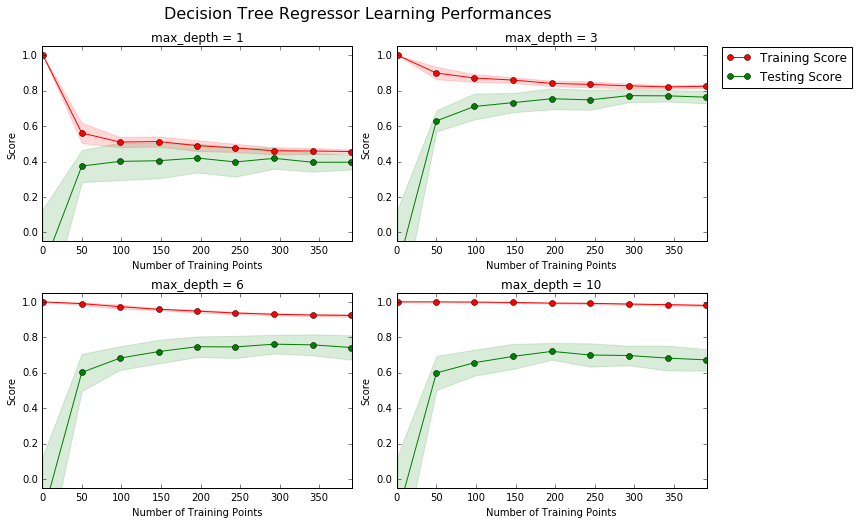

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

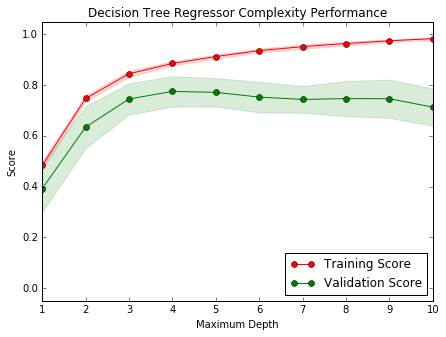

In [17]:
vs.ModelComplexity(X_train, y_train)

In [13]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [14]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 1 for the optimal model.


**Answer: ** Parameter 'max_depth' is 1 for the optimal model.

In [16]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

print reg.predict(client_data)
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

[ 359109.05172414  359109.05172414  589135.8490566 ]
Predicted selling price for Client 1's home: $359,109.05
Predicted selling price for Client 2's home: $359,109.05
Predicted selling price for Client 3's home: $589,135.85


**Answer: **

Predicted selling price for Client 1s home: $359,109.05

Predicted selling price for Client 2s home: $359,109.05

Predicted selling price for Client 3s home: $589,135.85


In [17]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $359,109.05
Trial 2: $386,122.50
Trial 3: $403,536.00
Trial 4: $403,040.91
Trial 5: $381,533.58
Trial 6: $363,973.08
Trial 7: $403,955.49
Trial 8: $401,985.23
Trial 9: $359,605.06
Trial 10: $362,853.19

Range in prices: $44,846.44



The constructed model cannot be used in a real world setting due to the fact that the variation in prices from 10 trails is approx  USD45,000. The models sensitivity is higher for a home that costs USD360,000 and a real world business cannot afford such misclassification cost. Also the dataset doesn't have enough features to truly evaluate the value of houses and the price range in trials might actually be lower if we added some more features. This could lead to building a more complex-robust model to make consistent predictions with better accuracy. Also we can make sure the bias-variance trade off is maintained with adding more data and features. 

I dont think this data can be used to predict house prices in rural setting as the features value might differ according to the demographics. if we do so, we might have higher price predictions for a normal house and it would not turn out to be a satisfiying investment for the client. 